# CNMF Componenent evaluation

This is similar to the last visualization in `cnmf_viz.ipynb` but combines it with component evaluation

In [1]:
from mesmerize_core import *
import numpy as np
import pandas as pd

from ipywidgets import FloatSlider, FloatText, Label, HBox, VBox, link, Layout
from collections import OrderedDict

2023-02-21 11:30:51.186807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 11:30:51.334054: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kushal/venvs/workshop/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-21 11:30:51.334090: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-21 11:30:52.076629: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'

In [2]:
from fastplotlib import ImageWidget, Plot, GridPlot
from fastplotlib.utils import make_colors
from fastplotlib.graphics.line_slider import LineSlider

In [3]:
pd.options.display.max_colwidth = 120

# Paths

In [4]:
# for this demo set this dir as the path to your `caiman_data` dir
set_parent_raw_data_path("/home/kushal/caiman_data/")

# batch path
batch_path = get_parent_raw_data_path().joinpath("mesmerize-batch/batch.pickle")

## Load batch

In [5]:
df = load_batch(batch_path)
df

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,mcorr,Sue_2x_3000_40_-46,example_movies/Sue_2x_3000_40_-46.tif,"{'main': {'max_shifts': (6, 6), 'strides': (24, 24), 'overlaps': (12, 12), 'max_deviation_rigid': 3, 'border_nan': '...",{'mean-projection-path': 249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df_mean_projection.n...,2023-01-28T14:34:58,2023-01-28T14:39:47,64.96 sec,None,249713a8-757b-467e-8ae2-4108160378df
1,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (4, 4), 'ssub': 1, 't...",{'mean-projection-path': 763c9f74-3847-4b01-af9c-550e2f46f2e5/763c9f74-3847-4b01-af9c-550e2f46f2e5_mean_projection.n...,2023-01-28T14:43:42,2023-01-28T14:44:54,53.65 sec,None,763c9f74-3847-4b01-af9c-550e2f46f2e5
2,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.8, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (6, 6), 'ssub': 1, 'ts...",{'mean-projection-path': 793c72ed-67b7-42dd-bc6c-70edcaf81cb2/793c72ed-67b7-42dd-bc6c-70edcaf81cb2_mean_projection.n...,2023-01-28T14:43:44,2023-01-28T14:46:13,73.42 sec,None,793c72ed-67b7-42dd-bc6c-70edcaf81cb2
3,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.95, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (6, 6), 'ssub': 1, 't...",{'mean-projection-path': d752e113-6241-4866-bb96-c293bbd57e95/d752e113-6241-4866-bb96-c293bbd57e95_mean_projection.n...,2023-01-28T14:43:44,2023-01-28T14:47:32,70.55 sec,None,d752e113-6241-4866-bb96-c293bbd57e95
4,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.8, 'rf': 15, 'stride': 6, 'K': 8, 'gSig': (6, 6), 'ssub': 1, 'ts...",{'mean-projection-path': 801ee5c5-bdbb-4b7b-850c-f57d535eee02/801ee5c5-bdbb-4b7b-850c-f57d535eee02_mean_projection.n...,2023-01-28T14:43:44,2023-01-28T14:48:54,76.34 sec,None,801ee5c5-bdbb-4b7b-850c-f57d535eee02
5,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.95, 'rf': 15, 'stride': 6, 'K': 8, 'gSig': (6, 6), 'ssub': 1, 't...",{'mean-projection-path': c0f30b7e-5e6c-4177-81bc-042fc410850a/c0f30b7e-5e6c-4177-81bc-042fc410850a_mean_projection.n...,2023-01-28T14:43:44,2023-01-28T14:50:22,81.35 sec,None,c0f30b7e-5e6c-4177-81bc-042fc410850a
6,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.8, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (8, 8), 'ssub': 1, 'ts...",{'mean-projection-path': e666e0b8-323c-487d-91a8-5f798a1fd15a/e666e0b8-323c-487d-91a8-5f798a1fd15a_mean_projection.n...,2023-01-28T14:43:44,2023-01-28T14:51:46,76.99 sec,None,e666e0b8-323c-487d-91a8-5f798a1fd15a
7,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.95, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (8, 8), 'ssub': 1, 't...",{'mean-projection-path': cf2371fd-0fa1-40d9-8d60-c567000f6f4a/cf2371fd-0fa1-40d9-8d60-c567000f6f4a_mean_projection.n...,2023-01-28T14:43:44,2023-01-28T14:53:05,72.49 sec,None,cf2371fd-0fa1-40d9-8d60-c567000f6f4a
8,cnmf,Sue_2x_3000_40_-46,249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1...

In [6]:
# You can change this to plot the outputs for different batch items
index = 1

# get the motion corrected input movie as a memmap
cnmf_movie = df.iloc[index].caiman.get_input_movie()

# we can get the contours of the spatial components
contours, coms = df.iloc[index].cnmf.get_contours("all", swap_dim=False)

# and temporal components
temporal = df.iloc[index].cnmf.get_temporal("all")

ixs_good = df.iloc[index].cnmf.get_good_components()
ixs_bad = df.iloc[index].cnmf.get_bad_components()

cnmf_obj = df.iloc[index].cnmf.get_output()

Decode mmap filename /home/kushal/caiman_data/mesmerize-batch/249713a8-757b-467e-8ae2-4108160378df/249713a8-757b-467e-8ae2-4108160378df-Sue_2x_3000_40_-46_els__d1_170_d2_170_d3_1_order_F_frames_3000.mmap


## This is just UI layout stuff

In [7]:
# low thresholds
lt = OrderedDict(
    rval_lowest=(-1.0, -1.0, 1.0), # (val, min, max)
    SNR_lowest=(0.5, 0., 100), 
    cnn_lowest=(0.1, 0., 1.0),
)

# high thresholds
ht = OrderedDict(
    rval_thr=(0.8, 0., 1.0),
    min_SNR=(2.5, 0., 100),
    min_cnn_thr=(0.9, 0., 1.0),
)

lw = list()
for k in lt:
    kwargs = dict(value=lt[k][0], min=lt[k][1], max=lt[k][2], step=0.01, description=k)
    slider = FloatSlider(**kwargs)
    entry = FloatText(**kwargs, layout=Layout(width="150px"))
    
    link((slider, "value"), (entry, "value"))
    
    lw.append(HBox([slider, entry]))
    
hw = list()
for k in ht:
    kwargs = dict(value=ht[k][0], min=ht[k][1], max=ht[k][2], step=0.01, description=k)
    slider = FloatSlider(**kwargs)
    entry = FloatText(**kwargs, layout=Layout(width="150px"))
    
    link((slider, "value"), (entry, "value"))
    
    hw.append(HBox([slider, entry]))

def get_eval_params():
    """get the values from the GUI"""
    _eval_params = [{w.children[0].description: w.children[0].value for w in ws} for ws in [lw, hw]]
    return {**_eval_params[0], **_eval_params[1]}

# Visualization code

In [8]:
# create a simple plot
iw = ImageWidget(data=cnmf_movie, vmin_vmax_sliders=True, cmap="gray")
iw.show()

RFBOutputContext()

MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



# plot all contours
note how we didn't set any colors

In [9]:
# remember that we can access the underlying plot within the ImageWidget
iw.plot

unnamed: Plot @ 0x7fe9c9675610
  parent: None
  Graphics:
	'image': ImageGraphic @ 0x7fe9c9634fd0

In [10]:
# this is just a Plot instance so it behaves just like any Plot
iw.plot.add_line_collection(contours, name="contours")

'contours': LineCollection @ 0x7fe99c163280
Collection of <155> Graphics

# this is a graphic collection

In [11]:
iw.plot["contours"]

# can also index like this because it was the second item to be added
# this shows why named-indexing is so useful!
# iw.plot.graphics[1]

'contours': LineCollection @ 0x7fe99c163280
Collection of <155> Graphics

# take a look at `ixs_good`

In [12]:
ixs_good

array([  0,   4,  10,  14,  15,  16,  20,  21,  24,  25,  26,  27,  28,
        29,  31,  33,  39,  41,  42,  43,  44,  45,  46,  51,  52,  55,
        57,  58,  59,  60,  64,  66,  67,  69,  71,  75,  87,  88,  91,
        95, 107, 109, 112, 114, 115, 116, 120, 121, 122, 124, 125, 126,
       130, 132, 134, 139, 141, 142, 143, 144, 146, 147, 149, 152, 153,
       154])

# Graphics collections support fancy indexing! :D 

In [13]:
# index graphic collection :D 
iw.plot["contours"][ixs_good]

CollectionIndexer @ 0x7fe94822dd00
Selection of <66> LineGraphic

# AND you can modify the colors for this selection!

In [14]:
iw.plot["contours"][ixs_good].colors = "cyan"

# set colors of the bad contours

In [15]:
iw.plot["contours"][ixs_bad].colors = "magenta"

# OR modify a different feature

In [16]:
iw.plot["contours"][ixs_bad].thickness = 1

In [17]:
iw.plot["contours"][ixs_bad].thickness = 2
iw.plot["contours"][ixs_bad].present = False

In [18]:
iw.plot.canvas.close()

In [8]:
# plot contours according to good/bad colors
MODE = "colors"

label_eval = Label(value="")

eval_params = get_eval_params()

# ImageWidget with movie and contours
iw = ImageWidget(data=cnmf_movie, vmin_vmax_sliders=True, cmap="gray")
iw.plot.add_line_collection(contours, name="contours")

# line plot
plot_l = Plot()
plot_l.add_line_collection(temporal, name="temporal")

ls = LineSlider(x_pos=0, bounds=(temporal.min(), temporal.max()), slider=iw.sliders["t"])
plot_l.add_graphic(ls)

@iw.plot.renderer.add_event_handler("resize")
def update_with(*args):
    w = iw.plot.canvas.get_logical_size()[0]
    h = plot_l.canvas.get_logical_size()
    plot_l.canvas.set_logical_size(w, h)


# animate func just like mcorr viz
def update_eval(p):
    global eval_params
    
    new_eval_params = get_eval_params()
    
    if new_eval_params == eval_params:
        return
    eval_params = new_eval_params
    
    label_eval.value = "Please wait running eval..."
    # run eval
    df.iloc[index].cnmf.run_eval(new_eval_params)
    label_eval.value = ""
    
    # get the new indices after eval
    good_ixs = df.iloc[index].cnmf.get_good_components()
    bad_ixs = df.iloc[index].cnmf.get_bad_components()
    
    if MODE == "colors":
        # make sure all of them are present
        p["contours"][:].present = True
        
        # set colors
        p["contours"][:].colors.block_events(True)
        p["contours"][good_ixs].colors = "cyan"
        p["contours"][bad_ixs].colors = "magenta"
        p["contours"][:].colors.block_events(False)
    
    elif MODE == "present":
        # make them all cyan
        p["contours"][:].colors = "cyan"
        
        # set present=True for good
        p["contours"][:].colors.block_events(True)
        p["contours"][good_ixs].present = True
        p["contours"][bad_ixs].present = False
        p["contours"][:].colors.block_events(False)

iw.plot.add_animations(update_eval)

VBox([
    plot_l.show(),
    iw.show(), 
    label_eval,
    Label(value="Low Thresholds"),
    *lw,
    Label(value="High Thresholds"),
    *hw   
])

RFBOutputContext()

MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



RFBOutputContext()

In [9]:
eval_params

{'rval_lowest': -1.0,
 'SNR_lowest': 0.5,
 'cnn_lowest': 0.1,
 'rval_thr': 0.8,
 'min_SNR': 2.5,
 'min_cnn_thr': 0.9}

In [10]:
# not important to understand for now, will be made public in the next version
def euclidean(source, target, event, new_data):
    """maps click events to contour"""
    # calculate coms of line collection
    indices = np.array(event.pick_info["index"])
    
    coms = list()

    for contour in target.graphics:
        coors = contour.data()[~np.isnan(contour.data()).any(axis=1)]
        com = coors.mean(axis=0)
        coms.append(com)

    # euclidean distance to find closest index of com 
    indices = np.append(indices, [0])
    
    ix = int(np.linalg.norm((coms - indices), axis=1).argsort()[0])
    
    # should typically never access private methods
    target._set_feature(feature="colors", new_data=new_data, indices=ix)
    
    return None

# image -> contours
iw.plot["image"].link(
    "click",
    target=iw.plot["contours"],
    feature="colors", 
    new_data="w", 
    callback=euclidean
)

plot_l["temporal"][:].present = False
plot_l["temporal"][:].present.add_event_handler(plot_l.auto_scale)

# contours -> temporal present
iw.plot["contours"].link(
    event_type="colors",
    target=plot_l["temporal"],
    feature="present",
    new_data=True
)

# Ignore everything below

I will make better component eval in a few weeks, help is welcome :D 

View cmaps with `r_values`, `cnn_preds`, `comp_SNR`

Click on components and press `"g"` to add to good, `"b"` to add to bad.

In [9]:
rcm = df.iloc[index].cnmf.get_rcm()
corr_img = df.iloc[index].caiman.get_corr_image()

In [ ]:
# 2 x 2 gridplot
# |=====================|
# |  movie |    rcm     |
# |---------------------|
# | corr  |  temporal   |
# |=====================|
cnmf_grid = GridPlot(
    shape=(2, 2), 
    controllers=[[0, 0], [0, 1]], 
    names=[["movie", "rcm"], ["corr", "temporal"]]
)

# movie and rcm, rcm is a lazy array and behaves similar to numpy arrays
movie_graphic = cnmf_grid["movie"].add_image(cnmf_movie[0], cmap="gnuplot2")
rcm_graphic = cnmf_grid["rcm"].add_image(rcm[0], cmap="gnuplot2")

# corr image
cnmf_grid["corr"].add_image(corr_img, cmap="viridis")

# contours for good components
contours_good, coms = df.iloc[index].cnmf.get_contours("good", swap_dim=False)

# random colors for contours and temporal components
# make an RGBA array for each color
rand_colors = np.random.rand(len(contours_good), 4)  # [n_contours, RGBA]
rand_colors[:, -1] = 1 # set alpha = 1

# get temporal of only good components
temporal_good = df.iloc[index].cnmf.get_temporal("good")

# add contours to both movie and rcm subplots
contours_movie = cnmf_grid["movie"].add_line_collection(contours_good, colors=rand_colors)
contours_rcm = cnmf_grid["rcm"].add_line_collection(contours_good, colors=rand_colors)

# line stack of temporal components
temporal_stack = cnmf_grid["temporal"].add_line_stack(temporal_good, colors=rand_colors, thickness=3.0, separate=15)

# plot single temporal, just like before
plot_temporal_single = Plot()
temporal_graphic = plot_temporal_single.add_line_collection(temporal_good, colors=rand_colors)

# since this is a GridPlot and not an ImageWidget we need to define sliders
slider = IntSlider(min=0, max=cnmf_movie.shape[0] - 1, value=0, step=1)

# vertical line sliders
_ls = LineSlider(x_pos=0, bounds=(temporal.min(), temporal.max()), slider=slider)
_ls2 = LineSlider(x_pos=0, bounds=(temporal.min(), temporal.max() + temporal_stack.items[-1].position.y), slider=slider)
plot_temporal_single.add_graphic(_ls)
cnmf_grid["temporal"].add_graphic(_ls2)

# function to update each frame
def update_frame(change):
    ix = change["new"]
    movie_graphic.data = cnmf_movie[ix]
    rcm_graphic.data = rcm[ix]
    
slider.observe(update_frame, "value")

@plot_temporal_single.renderer.add_event_handler("resize")
def update_slider_width(*args):
    width, h = plot_temporal_single.renderer.logical_size
    slider.layout = Layout(width=f"{width}px")
    
VBox([plot_temporal_single.show(), cnmf_grid.show(), slider])

In [13]:
rcm_good = df.iloc[index].cnmf.get_rcm("good")
rcm_bad = df.iloc[index].cnmf.get_rcm("bad")

RFBOutputContext()


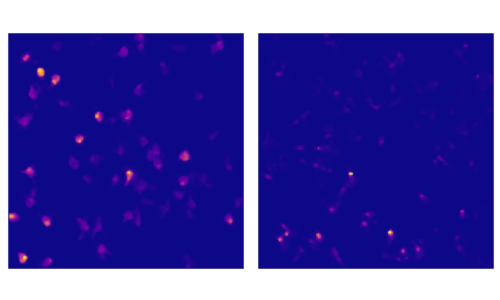

JupyterWgpuCanvas()

In [14]:
plot = GridPlot(shape=(1, 2))
plot[0, 0].add_image(rcm_good.max_image)
plot[0, 1].add_image(rcm_bad.max_image)
plot.show()